## Observations and Insights 

- Reliable data with only 1 outlier within Infubinol drug regimen (based on box plot chart).

- Across the top four drug regimens, Capomuling and Ramicane are the most effective, shown by the lowest tumor volume (based on the box plot chart).

- Tumor volume is strongly and positively correlated to mouse weight, shown by correlation coefficient of 0.95.


In [155]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_study_df = pd.merge(mouse_metadata,study_results,on=["Mouse ID"])

# Display the data table for preview
merged_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [156]:
# Checking the number of mice.
len(merged_mouse_study_df["Mouse ID"].unique())

249

In [157]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_mouse_study_df ["duplicated"]= merged_mouse_study_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False) == True
duplicated_mouse_timepoint = merged_mouse_study_df.loc[merged_mouse_study_df["duplicated"] == True,:]



In [158]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mouse_timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [159]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study_df = merged_mouse_study_df.drop_duplicates(subset=["Mouse ID","Timepoint"],keep='first')

# Remove the duplicated column
reduced_mouse_study_df = cleaned_mouse_study_df[["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"]]
reduced_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [160]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reduced_mouse_study_df.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [161]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_group_df = reduced_mouse_study_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = drug_group_df["Tumor Volume (mm3)"].mean()
median_tumor_volume = drug_group_df["Tumor Volume (mm3)"].median()
variance_tumor_volume = drug_group_df["Tumor Volume (mm3)"].var()
stdvar_tumor_volume = drug_group_df["Tumor Volume (mm3)"].std()
sem_tumor_volume = drug_group_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
unique_drug_regimen = reduced_mouse_study_df["Drug Regimen"].unique()
tumor_vol_stat_df = pd.DataFrame({
    "Average Tumor Volume (mm3)": mean_tumor_volume,
    "Median Tumor Volume (mm3)":median_tumor_volume,
    "Variance Tumor Volume (mm3)": variance_tumor_volume,
    "Standard Deviation Tumor Volume (mm3)": stdvar_tumor_volume,
    "SEM Tumor Volume (mm3)": sem_tumor_volume})

tumor_vol_stat_df


,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [162]:

# Using the aggregation method, produce the same summary statistics in a single line
drug_group_df["Tumor Volume (mm3)"].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

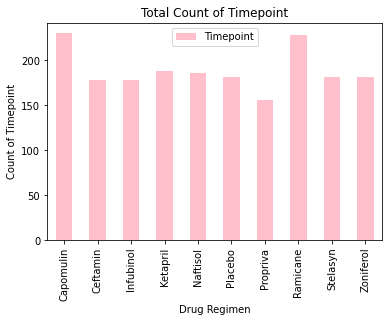

In [163]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_timepoint = drug_group_df["Timepoint"].count()
count_timepoint_df = pd.DataFrame(count_timepoint)
count_timepoint_df.plot.bar(color = "pink")
plt.title("Total Count of Timepoint")
plt.ylabel("Count of Timepoint")
plt.legend(loc="best")


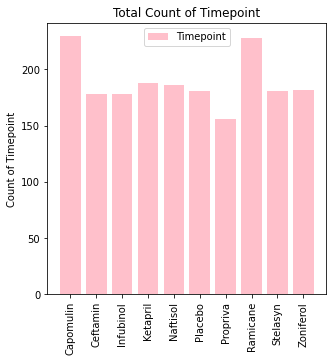

In [164]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# create dataframe on drug regimen unique value
unique_regimen = reduced_mouse_study_df["Drug Regimen"].unique()
unique_regimen_df = pd.DataFrame(unique_regimen)
unique_regimen_df = unique_regimen_df.rename(columns={0: "Drug Regimen"})

# merge drug regiment unique value and count timepoint df
merged_regimen_timepoint_count = pd.merge(count_timepoint_df,unique_regimen_df,on="Drug Regimen")
merged_regimen_timepoint_count


# x_axis = np.arange(len(count_timepoint_df))
# tick_locations = [value for value in x_axis]

timepoint_x_axis = merged_regimen_timepoint_count["Drug Regimen"]
timepoint_y_axis = merged_regimen_timepoint_count["Timepoint"]

plt.figure(figsize=(5,5))
plt.bar(timepoint_x_axis, timepoint_y_axis,color="pink")
plt.xticks(timepoint_x_axis,rotation="vertical")
plt.title("Total Count of Timepoint")
plt.ylabel("Count of Timepoint")
plt.legend(["Timepoint"],loc="best")

<AxesSubplot:ylabel='Sex'>

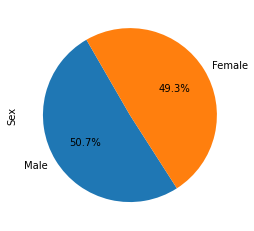

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_type_count = reduced_mouse_study_df['Sex'].value_counts()
sex_type_count.plot.pie(autopct='%1.1f%%',startangle=120)




([<matplotlib.patches.Wedge at 0x2721d4cbc40>,
 [Text(-0.9395580188282951, -0.5720408457928937, 'Male'),
  Text(0.93955807238662, 0.5720407578251212, 'Female')],
 [Text(-0.5124861920881609, -0.3120222795233965, '50.7%'),
  Text(0.5124862213017927, 0.31202223154097514, '49.3%')])

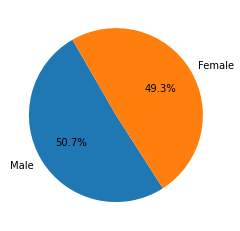

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_values = reduced_mouse_study_df['Sex'].value_counts()
pie_labels = reduced_mouse_study_df['Sex'].unique()
plt.pie(pie_values,labels=pie_labels,autopct='%1.1f%%',startangle=120)


## Quartiles, Outliers and Boxplots

In [167]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_df = reduced_mouse_study_df[["Mouse ID","Drug Regimen","Tumor Volume (mm3)","Timepoint"]]
group_mouse_df = tumor_volume_df.groupby(["Mouse ID"])
max_timepoint = group_mouse_df["Timepoint"].max()
max_timepoint_df = pd.DataFrame({"Timepoint": max_timepoint})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_max_timepoint = pd.merge(max_timepoint_df,tumor_volume_df, on=["Mouse ID","Timepoint"])
#index_merged_max_timepoint = merged_max_timepoint.set_index("Drug Regimen")
#index_merged_max_timepoint

merged_max_timepoint

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686
...,...,...,...,...
244,z435,10,Propriva,48.710661
245,z578,45,Ramicane,30.638696
246,z581,45,Infubinol,62.754451
247,z795,45,Naftisol,65.741070


In [168]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
treatments_volume = []

for treatment in treatments:
    treatments_df = merged_max_timepoint.loc[merged_max_timepoint["Drug Regimen"] == treatment]
    volume = treatments_df["Tumor Volume (mm3)"]
    treatments_volume.append(volume)
# Create empty list to fill with tumor vol data (for plotting)
    # tumor volume data at the maximum timepoint is included in treatments_df

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatments_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lower_vol_quartile = quartiles[0.25]
    upper_vol_quartile = quartiles[0.75]
    iqr = round(upper_vol_quartile-lower_vol_quartile,2)
    print(f'{treatment} IQR is {iqr}')
    

    # Locate the rows which contain mice on each drug and get the tumor volumes
        # data is included in treatments_df
    
    # add subset 
        # data is included in treatments_df
    
    # Determine outliers using upper and lower bounds
    lower_vol_bound = round(lower_vol_quartile - (1.5 * iqr),2)
    upper_vol_bound = round(upper_vol_quartile + (1.5 * iqr),2)
    print(f'{treatment} lower bound is {lower_vol_bound}')
    print(f'{treatment} upper bound is {upper_vol_bound}')

    # count outliers
    lower_outliers_vol_count = treatments_df["Tumor Volume (mm3)"].loc[treatments_df["Tumor Volume (mm3)"] <= lower_vol_bound].count()
    upper_outliers_vol_count = treatments_df["Tumor Volume (mm3)"].loc[treatments_df["Tumor Volume (mm3)"] >= upper_vol_bound].count()
    total_outliers_count = lower_outliers_vol_count + upper_outliers_vol_count
    print(f'{treatment} ouliers count is {total_outliers_count}')

Capomulin IQR is 7.78
Capomulin lower bound is 20.71
Capomulin upper bound is 51.83
Capomulin ouliers count is 0
Ramicane IQR is 9.1
Ramicane lower bound is 17.91
Ramicane upper bound is 54.31
Ramicane ouliers count is 0
Infubinol IQR is 11.48
Infubinol lower bound is 36.83
Infubinol upper bound is 82.75
Infubinol ouliers count is 1
Ceftamin IQR is 15.58
Ceftamin lower bound is 25.35
Ceftamin upper bound is 87.67
Ceftamin ouliers count is 0


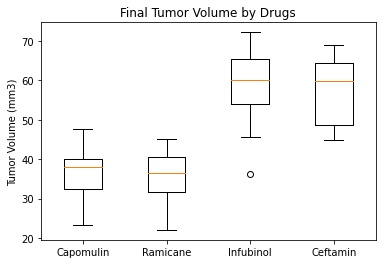

In [169]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(treatments_volume)
plt.xticks([1,2,3,4],["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.title("Final Tumor Volume by Drugs")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



## Line and Scatter Plots

In [170]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# sample of mouse treated using Capomulin
capomulin_mouse = reduced_mouse_study_df.loc[(reduced_mouse_study_df["Drug Regimen"] == "Capomulin")]
capomulin_mouse



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


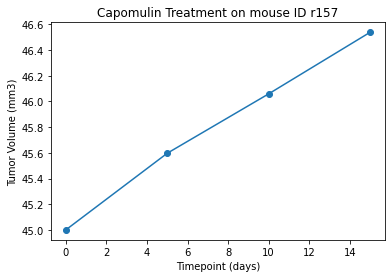

In [171]:
# Plotting mouse ID r157
r157_data = reduced_mouse_study_df.loc[(reduced_mouse_study_df["Mouse ID"] == "r157")]
plt.plot(r157_data["Timepoint"],r157_data["Tumor Volume (mm3)"], marker = "o")
plt.title("Capomulin Treatment on mouse ID r157")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

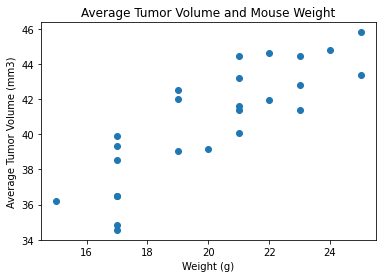

In [172]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# calculate average tumor volume
group_capomulin_mosue = capomulin_mouse.groupby(["Mouse ID"])
capomulin_mouse_avg_vol = group_capomulin_mosue["Tumor Volume (mm3)"].mean()
capomulin_mouse_avg_vol

# merge to get the mouse weight
capomulin_mouse_vol_weight = pd.merge(capomulin_mouse_avg_vol,reduced_mouse_study_df,on="Mouse ID")
final_capomulin_mouse_vol_weight = capomulin_mouse_vol_weight[["Weight (g)","Tumor Volume (mm3)_x"]].drop_duplicates()

# scatter plotting
x_axis = final_capomulin_mouse_vol_weight["Weight (g)"]
y_axis = final_capomulin_mouse_vol_weight["Tumor Volume (mm3)_x"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume and Mouse Weight")
plt.show()

## Correlation and Regression

Correlation coefficient between weight and average tumor volume for Capomulin drug regimen is 0.8419363424694719.


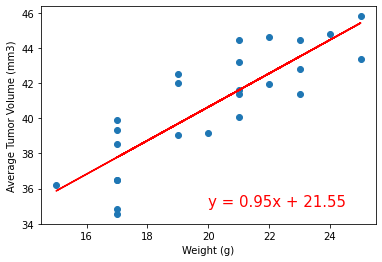

In [173]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# calculating correlation coefficient using the above data frame
x= final_capomulin_mouse_vol_weight["Weight (g)"]
y= final_capomulin_mouse_vol_weight["Tumor Volume (mm3)_x"]
corr_coeff = st.pearsonr(x,y)

print(f'Correlation coefficient between weight and average tumor volume for Capomulin drug regimen is {corr_coeff[0]}.')

# calculating linear regeression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
